In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f_train = open("./train.txt")
f_test = open('./test.txt')
f_val = open('./valid.txt')

In [3]:
def txt_to_lst(f):

  f.seek(0)
  X = []
  y = []
  for line in f:

  # check for empty lines and file start string

    if len(line) > 0 and line[0] != "\n" and not line.startswith("-DOCSTART"):
      chunks = line.split(" ")
      word = chunks[0]

      if len(word) == 0:
        continue
        
      label = chunks[-1][:-1]

      data = {"word": word, "label": label}

      X.append(word)
      y.append(label)

  return X, y

In [4]:
X_train , y_train = txt_to_lst(f_train)
X_test , y_test = txt_to_lst(f_test)
X_val , y_val = txt_to_lst(f_val)

In [5]:
print("Number of Train Samples: ", len(X_train))
print("Number of Test Samples: ", len(X_test))
print("Number of Validation Samples: ", len(X_val))

Number of Train Samples:  203621
Number of Test Samples:  46435
Number of Validation Samples:  51362


In [6]:
print("Number of Categories: ", list(set(y_train)))

Number of Categories:  ['I-MISC', 'I-PER', 'O', 'B-MISC', 'B-LOC', 'I-ORG', 'B-ORG', 'B-PER', 'I-LOC']


In [7]:
# classes: ['PER', 'LOC', 'MISC', 'ORG']
classes = {'PER': 1, 'LOC': 2, 'MISC': 3, 'ORG': 4, 'O':0}

In [8]:
def str_to_cat(y_list):

  y_return = []
  for y in y_list:
    y_return.append(classes[y.split('-')[-1]])

  return y_return

In [9]:
y_train_enc = str_to_cat(y_train)
y_test_enc = str_to_cat(y_test)
y_val_enc = str_to_cat(y_val)

In [13]:
count_classes_train = {'PER': y_train_enc.count(1), 'LOC': y_train_enc.count(2), 
                 'MISC': y_train_enc.count(3), 'ORG': y_train_enc.count(4), 
                 }

In [11]:
count_classes_train

{'LOC': 8297, 'MISC': 4593, 'ORG': 10025, 'PER': 11128}

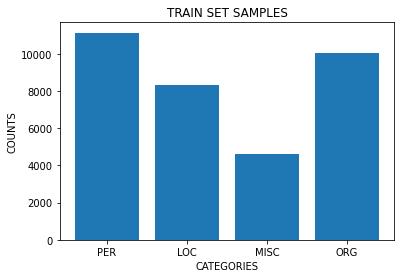

In [17]:
plt.bar(count_classes_train.keys(), count_classes_train.values())
plt.xlabel("CATEGORIES")
plt.ylabel("COUNTS")
plt.title("TRAIN SET SAMPLES");

In [18]:
count_classes_valid = {'PER': y_val_enc.count(1), 'LOC': y_val_enc.count(2), 
                 'MISC': y_val_enc.count(3), 'ORG': y_val_enc.count(4), 
                 }

In [22]:
count_classes_valid

{'LOC': 2094, 'MISC': 1268, 'ORG': 2092, 'PER': 3149}

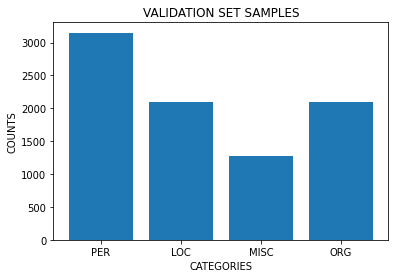

In [19]:
plt.bar(count_classes_valid.keys(), count_classes_valid.values())
plt.xlabel("CATEGORIES")
plt.ylabel("COUNTS")
plt.title("VALIDATION SET SAMPLES");

In [20]:
count_classes_test = {'PER': y_test_enc.count(1), 'LOC': y_test_enc.count(2), 
                 'MISC': y_test_enc.count(3), 'ORG': y_test_enc.count(4), 
                 }

In [23]:
count_classes_test

{'LOC': 1925, 'MISC': 918, 'ORG': 2496, 'PER': 2773}

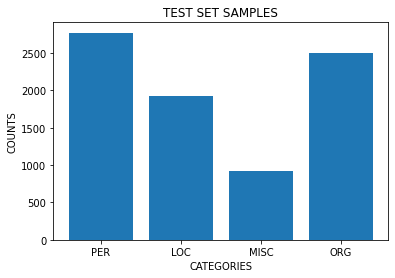

In [21]:
plt.bar(count_classes_test.keys(), count_classes_test.values())
plt.xlabel("CATEGORIES")
plt.ylabel("COUNTS")
plt.title("TEST SET SAMPLES");